In [3]:
#import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [15]:
#make and save df
df = pd.read_csv(r'E:\\Data engineering\python\pandas\proyecto piloto\FullShotsData.csv', index_col='player_id')
print(df)


                 id  minute       result      X      Y        xG  \
player_id                                                          
8865       378451.0      20  BlockedShot  0.876  0.602  0.019479   
8865       378458.0      54  MissedShots  0.878  0.430  0.031428   
8865       378464.0      77  MissedShots  0.858  0.679  0.060696   
8865       379954.0      34  MissedShots  0.831  0.655  0.127710   
8865       379956.0      46  MissedShots  0.943  0.500  0.445354   
...             ...     ...          ...    ...    ...       ...   
4267        28658.0      58  MissedShots  0.673  0.499  0.008183   
4311        25266.0      14  MissedShots  0.762  0.744  0.014528   
4311        25269.0      23    SavedShot  0.853  0.585  0.246003   
4311        31573.0      73  MissedShots  0.716  0.705  0.020342   
4311        31579.0      85  MissedShots  0.882  0.623  0.328080   

                     player h_a   situation  year   shotType  match_id  \
player_id                                

In [5]:
# show 5 rows
print(df.head(5))

# Tamaño y forma del dataframe
#print(df.shape)
#rint(df.size)

# Información general
print(df.info())

# Estadísticas descriptivas
#print(df.describe())


                 id  minute       result      X      Y        xG  \
player_id                                                          
8865       378451.0      20  BlockedShot  0.876  0.602  0.019479   
8865       378458.0      54  MissedShots  0.878  0.430  0.031428   
8865       378464.0      77  MissedShots  0.858  0.679  0.060696   
8865       379954.0      34  MissedShots  0.831  0.655  0.127710   
8865       379956.0      46  MissedShots  0.943  0.500  0.445354   

                  player h_a   situation  year   shotType  match_id  \
player_id                                                             
8865       Ollie Watkins   h    OpenPlay  2020       Head     14104   
8865       Ollie Watkins   h    OpenPlay  2020       Head     14104   
8865       Ollie Watkins   h    OpenPlay  2020  RightFoot     14104   
8865       Ollie Watkins   a    OpenPlay  2020  RightFoot     14114   
8865       Ollie Watkins   a  FromCorner  2020       Head     14114   

                h_team   

In [6]:
#Descriptive analysis
# Media de Goles
print("Media de goles en casa:", df['a_goals'].mean())

# Media de Goles esperados xG
print("Media de goles esperados:", df['xG'].mean())

# Media de Asistencias xA
print("Media de asistencias :", df['h_goals'].mean())



# Desviación estándar goles
print("Desviación estándar de goles :", df['a_goals'].std())

# Desviación estándar goles esperados
print("Desviación estándar de goles esperados:", df['xG'].std())

# Desviación estándar asistencias
print("Desviación estándar de asistencias:", df['h_goals'].std())

# Descripción de la columna 'a_goals'
print(df['a_goals'].describe())

# Descripción de la columna goles esperados
print(df['xG'].describe())

# Descripción de la columna Asistencias
print(df['h_goals'].describe())

Media de goles en casa: 1.2458006642243298
Media de goles esperados: 0.1079684896179182
Media de asistencias : 1.5917999109802445
Desviación estándar de goles : 1.1900256262439945
Desviación estándar de goles esperados: 0.16066477829600148
Desviación estándar de asistencias: 1.3340629052169728
count    292070.000000
mean          1.245801
std           1.190026
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           9.000000
Name: a_goals, dtype: float64
count    292070.000000
mean          0.107968
std           0.160665
min           0.000000
25%           0.023763
50%           0.049402
75%           0.093748
max           0.979887
Name: xG, dtype: float64
count    292070.000000
mean          1.591800
std           1.334063
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          10.000000
Name: h_goals, dtype: float64


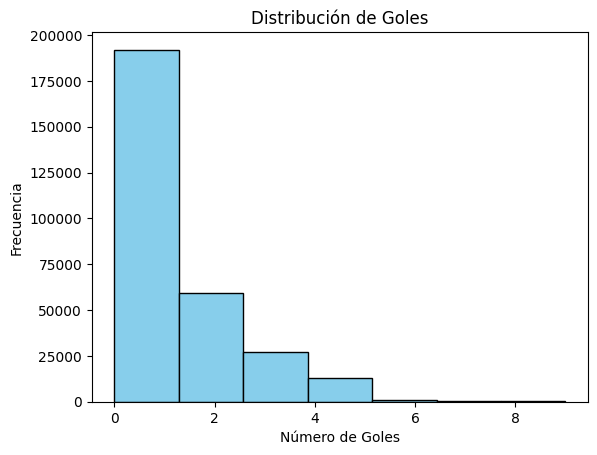

In [ ]:
#Univariate Visualization
# Crear histograma
plt.hist(df['a_goals'], bins=7, color='skyblue', edgecolor='black')

# Añadir títulos y etiquetas
plt.title("Distribución de Goles")
plt.xlabel("Número de Goles")
plt.ylabel("Frecuencia")

# Mostrar el gráfico
plt.show()



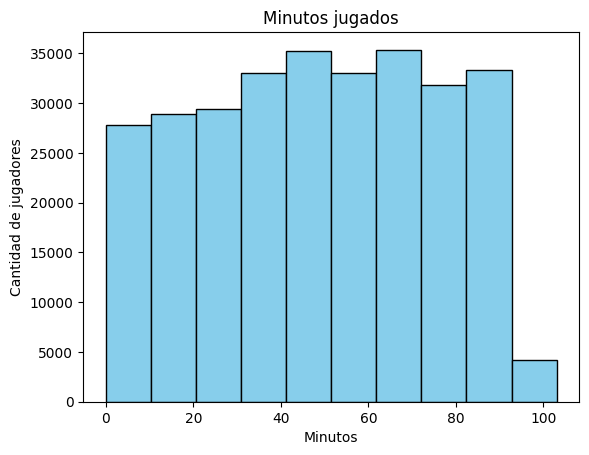

In [ ]:
# Univariate Visualization, minutes
plt.hist(df['minute'], bins=10, color='skyblue', edgecolor='black')

# Añadir títulos y etiquetas
plt.title("Minutos jugados")
plt.xlabel("Minutos")
plt.ylabel("Cantidad de jugadores")

# Mostrar el gráfico
plt.show()

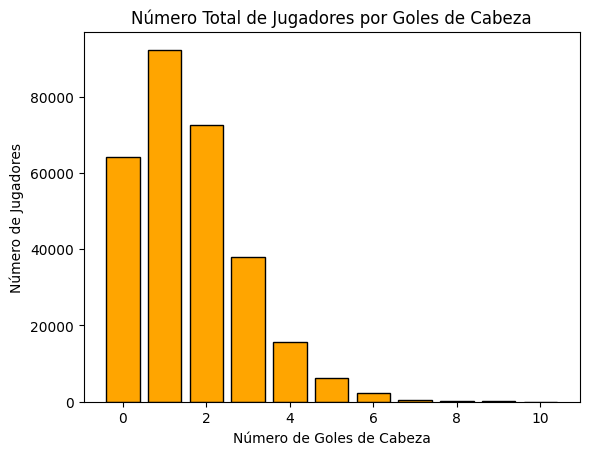

In [ ]:
#Bar Chart

import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por la columna 'h_goals' y contar el número de jugadores
goles_cabeza = df['h_goals'].value_counts()

# Crear el gráfico de barras
plt.bar(goles_cabeza.index, goles_cabeza.values, color='orange', edgecolor='black')

# Añadir títulos y etiquetas
plt.title("Número Total de Jugadores por Goles de Cabeza")
plt.xlabel("Número de Goles de Cabeza")
plt.ylabel("Número de Jugadores")

# Mostrar el gráfico
plt.show()


In [8]:
#null values



# Filtrar columnas con al menos un valor nulo
columnas_con_nulos = df.isnull().sum()[df.isnull().sum() > 0]

# Convertir el resultado a un DataFrame
resultado_df = columnas_con_nulos.reset_index()
resultado_df.columns = ['Columna', 'Valores Nulos']

print(resultado_df)



           Columna  Valores Nulos
0  player_assisted          77672
1       lastAction          33794


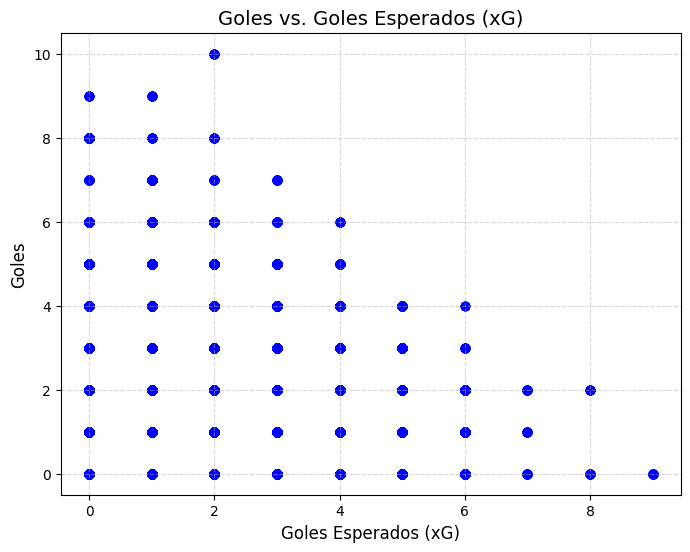

In [10]:
import matplotlib.pyplot as plt

# Datos de ejemplo


# Crear el scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df.a_goals, df.h_goals, color='blue', alpha=0.7)
plt.title('Goles vs. Goles Esperados (xG)', fontsize=14)
plt.xlabel('Goles Esperados (xG)', fontsize=12)
plt.ylabel('Goles', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

C:\Users\SR_\AppData\Local\Temp\ipykernel_880\2053808153.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='result', x='a_goals', data=df, palette='Set2')


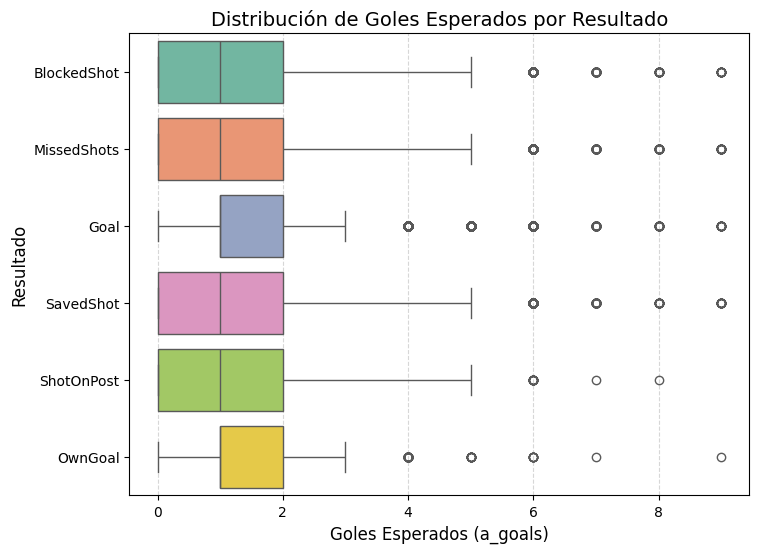

In [ ]:
#6

import seaborn as sns
import matplotlib.pyplot as plt

# Crear el boxplot con el eje cambiado
plt.figure(figsize=(8, 6))
sns.boxplot(y='result', x='a_goals', data=df, palette='Set2')
plt.title('Distribución de Goles Esperados por Resultado', fontsize=14)
plt.xlabel('Goles Esperados (a_goals)', fontsize=12)
plt.ylabel('Resultado', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


                id    minute         X         Y        xG      year  \
id        1.000000  0.004694  0.028686  0.004019  0.020912  0.982498   
minute    0.004694  1.000000  0.016625  0.001444  0.032173  0.005159   
X         0.028686  0.016625  1.000000 -0.009689  0.421577  0.028331   
Y         0.004019  0.001444 -0.009689  1.000000 -0.013601  0.004590   
xG        0.020912  0.032173  0.421577 -0.013601  1.000000  0.019677   
year      0.982498  0.005159  0.028331  0.004590  0.019677  1.000000   
match_id  0.867415  0.003106  0.019964  0.003832  0.018244  0.854365   
h_goals   0.004819 -0.014824  0.023559 -0.001929  0.083970  0.002823   
a_goals   0.043327 -0.001542  0.025853 -0.000189  0.064896  0.041703   

          match_id   h_goals   a_goals  
id        0.867415  0.004819  0.043327  
minute    0.003106 -0.014824 -0.001542  
X         0.019964  0.023559  0.025853  
Y         0.003832 -0.001929 -0.000189  
xG        0.018244  0.083970  0.064896  
year      0.854365  0.002823  0.0

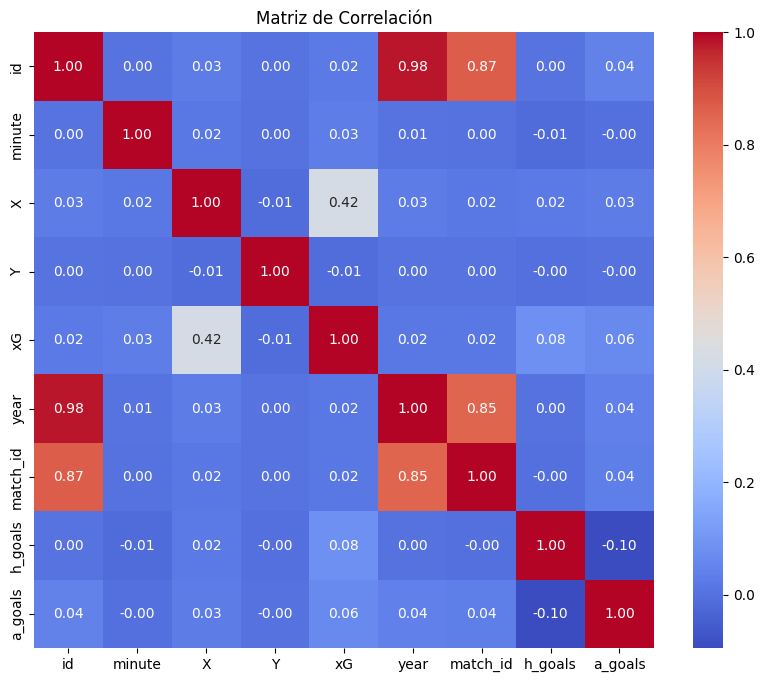

In [25]:
#7
import pandas as pd

# Asumiendo que ya tienes tu DataFrame cargado
# df = pd.read_csv(r'E:\\Data engineering\\python\\pandas\\proyecto piloto\\FullShotsData.csv', index_col='player_id')

# Filtrar solo las columnas numéricas
df_numerico = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
matriz_correlacion = df_numerico.corr()

print(matriz_correlacion)

# Rellenar valores NaN con ceros antes de la correlación (si aplica)
df_numerico = df_numerico.fillna(0)
print(df_numerico.columns)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()




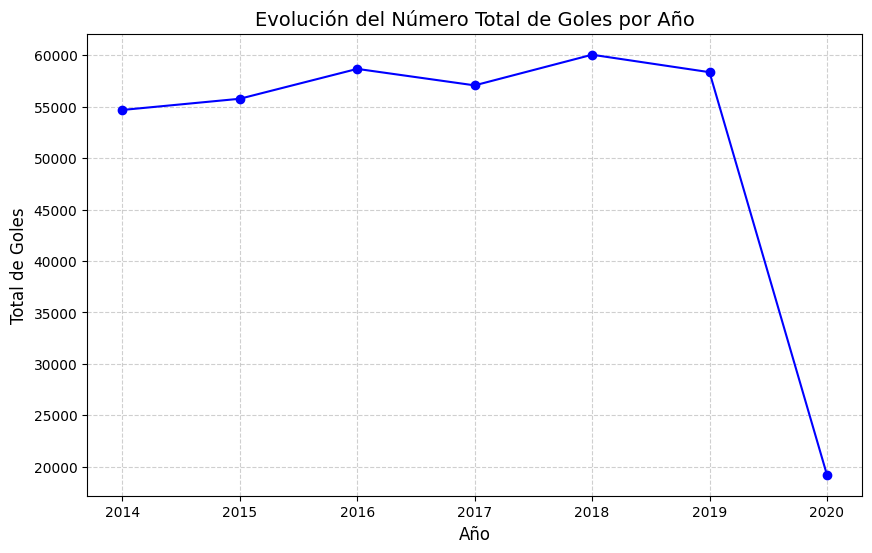

In [26]:
#9

import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de que tu DataFrame ya esté cargado con las columnas 'year' y 'goals'
# df = pd.read_csv(r'E:\\Data engineering\\python\\pandas\\proyecto piloto\\FullShotsData.csv', index_col='player_id')

# Agrupar por año y sumar los goles
goles_por_año = df.groupby('year')['a_goals'].sum()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(goles_por_año.index, goles_por_año.values, marker='o', linestyle='-', color='blue')
plt.title('Evolución del Número Total de Goles por Año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Total de Goles', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
